# 12월프로젝트

In [1]:
from matplotlib import font_manager

search_font = 'gothic' # 폰트를 검색해 경로와 이름을 출력

for font in font_manager.findSystemFonts():
    font_info = font_manager.FontProperties(fname=font) #폰트 속성 가져오기
    font_name = font_info.get_name() #폰트 이름 가져오기
    font_path = font_info.get_file() # 폰트 파일 경로 가져오기
    if search_font in font_name.lower(): # 고딕 폰트를 가져옴
        print(font_name, font_path)

## 폰트 등록하기
font_path = "C:/Users/user/AppData/Local/Microsoft/Windows/Fonts/H2GTRE.TTF"
font_manager.fontManager.addfont(font_path)
font_name = font_manager.FontProperties(fname=font_path).get_name()

NanumGothic C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumGothicLight.ttf
NanumBarunGothic C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumBarunGothicLight.ttf
HYGothic-Extra C:\Windows\Fonts\H2GTRE.TTF
NanumGothic C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumGothicExtraBold.ttf
Franklin Gothic Heavy C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\FRAHVIT.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
GothicI C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\gothici_0.ttf
GothicE C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\gothice.ttf
Century Gothic C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\GOTHICBI.TTF
Gothic Round XB C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\HMFERG.TTF
Century Gothic C:\Windows\Fonts\GOTHICBI.TTF
NanumBarunGothic C:\Users\user\AppData\Local\Microsoft\Windows\Fonts\NanumBarunGothicBold.ttf
Franklin Gothic Heavy C:\Windows\Fonts\FRAHV.TTF
Franklin Gothic Demi Cond C:\Windows\Fonts\FRADMCN.TTF
MJemokGoth

In [2]:
# 일반담배와 전자담배흡연율 추이 불러오기
import pandas as pd

elect_data = pd.read_csv('../data/질병관리청/액상형전자담배.csv', index_col=0).dropna().reset_index(drop=True)
nomal_data = pd.read_csv('../data/질병관리청/일반담배.csv', index_col=0).dropna().reset_index(drop=True)
# 전체흡연율만 필요해서 슬라이싱함함
nd = nomal_data.iloc[2][2:]
ed = elect_data.iloc[2][2:]

new_smoke = pd.concat([nd.astype(float),ed.astype(float)],axis=1) # 그래프 2개 합침
# 증감률 추이를 보여주기위해 diff, 그것을 누적으로 보여주기위해 cumsum사용
new_smoke = new_smoke.diff(axis=0).cumsum() 

<function matplotlib.pyplot.show(close=None, block=None)>

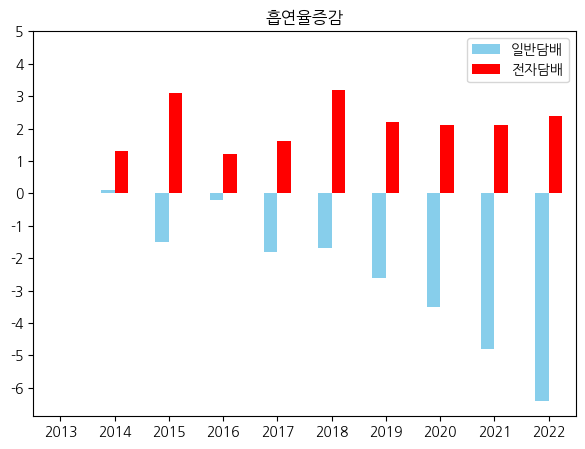

In [4]:
# 흡연율추이 시각화화
import matplotlib.pyplot as plt
import koreanize_matplotlib

new_smoke.plot(kind='bar', color=['skyblue', 'red'],figsize=[7,5])
plt.title('흡연율증감')
plt.legend(['일반담배', '전자담배'])
plt.xticks(rotation=0)
plt.yticks(range(-6,6))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

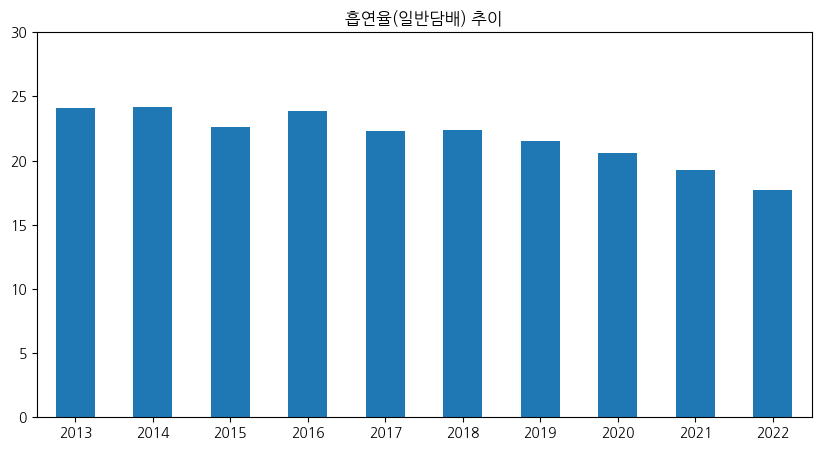

In [5]:
# 
nomal = pd.DataFrame(nd)
nomal.astype(float).plot(kind='bar',figsize=[10,5]).get_legend().remove()
plt.title('흡연율(일반담배) 추이')
plt.xticks(rotation=0)
plt.yticks(range(0,31,5))
plt.show

In [6]:
# 연도별 구매루트 비율율
route = pd.read_csv('../data/여성가족부/전자담배구매루트.csv',index_col=0).dropna().reset_index(drop=True)
route.iloc[:,3][2]

# 루트별 구입비중 구하기기
df = []
for i in range(len(route.columns)):
    if route.iloc[:,i][2] == "구입한 적 있음":
        df.append(route.iloc[:,i][0:4:3])
df = pd.DataFrame(df)


market = df.iloc[:,1][0::4].astype(float)
store = df.iloc[:,1][1::4].astype(float)
pc = df.iloc[:,1][2::4].astype(float)
internet = df.iloc[:,1][3::4].astype(float)

import numpy as np

arr = np.arange(2016,2021,2) # y축값 저장장

Text(0.5, 1.0, '전자담배 구매루트 추이')

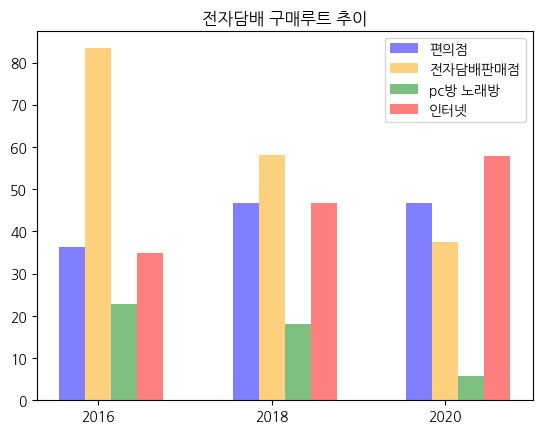

In [7]:
w = 0.3
plt.bar(arr-w,market,width=0.3, alpha=0.5, color='blue', label='편의점')
plt.bar(arr,store,width=0.3, alpha=0.5, color='orange', label='전자담배판매점')
plt.bar(arr+w,pc,width=0.3, alpha=0.5, color='green',label='pc방 노래방')
plt.bar(arr+w+w,internet,width=0.3, alpha=0.5, color='red', label='인터넷')
plt.xticks(range(2016,2021,2))
# plt.Subplots(figsize=[12,6])
plt.legend()
plt.title('전자담배 구매루트 추이')

In [8]:
import pandas as pd
import re 
import numpy as np
from konlpy.tag import Okt

wc = pd.read_csv('../data/네이버뉴스크롤링.csv', index_col=0).dropna().reset_index(drop=True)
okt = Okt()
# desc = wc['description'] 
title = wc['title']
stopwords = []

def divied(array):
    word_list = []
    for review in array.tolist():
        edit_review = re.sub('[^0-9a-zA-Z가-힣\\s+-]', '', review)
        edit_review_pos = okt.pos(edit_review)
        sub_list = []

        for word, pos in edit_review_pos:
            if len(word) < 2 or word in stopwords:
                continue
            elif pos =="Verb":
                sub_list.append(word)
        word_list.extend(sub_list)
    return word_list


In [9]:
from collections import Counter
from wordcloud import WordCloud


def cloud(array):
    counter = Counter(divied(array)) #단어의 빈도수를 계산
    counter2 = counter.most_common(30) #상위 30개의 단어만 추출
    
    #워드 클라우드 생성성
    wordcloud = WordCloud(font_path, background_color='white', width = 400, height=400,colormap='autumn').generate_from_frequencies(dict(counter2))
    
    plt.imshow(wordcloud)
    plt.axis('off')
    return plt.show()


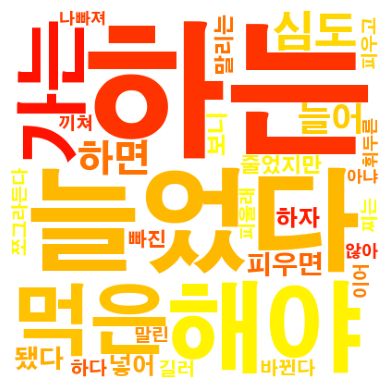

None


In [10]:
print(cloud(title))

In [58]:
import pandas as pd

okt = Okt()
# desc = wc['description'] 
title = wc['title']
stopwords = []

def divied(array):
    word_net = []
    for review in array.tolist():
        edit_review = re.sub('[^0-9a-zA-Z가-힣\\s+-]', '', review)
        edit_review_pos = okt.pos(edit_review)
        sub_list = []

        for word, pos in edit_review_pos:
            if len(word) < 2 or word in stopwords:
                continue
            elif pos =="Noun":
                sub_list.append(word)
        word_net.append(sub_list)
    return word_net

In [59]:
pd.DataFrame(divied(title))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,코로나,이후,우울증,고등,학력,미혼,흡연,위험,None,None,None,None,None
1,인니,새해,가치,담배,판매,금지,청소년,흡연,감축,목표,None,None,None
2,간접흡연,꽁초,젖병,아기,그림,아동학대,None,None,None,None,None,None,None
3,대마,유통,흡연,남양유업,창업,손자,혐의,인정,None,None,None,None,None
4,담배,때문,중년,흡연,위험,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,연인,폭행,황철순,옥중,사죄,편지,소하,금주,금연,None,None,None,None
1843,순간,대마,흡연,비투비,출신,정일훈,복귀,None,None,None,None,None,None
1844,단독,경찰,영호,의원,아들,대마,흡연,혐의,입건,None,None,None,None
1845,오늘,그래픽,청소년,흡연,음주,마음,건강,None,None,None,None,None,None


In [61]:
from apyori import apriori
import itertools
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

nsize = None

def ori(array):
    # 연관된 단어들을 추출
    result = list(apriori(divied(array)))
    new_data = pd.DataFrame(result)
    return new_data.sort_values(by='support', ascending=False)

In [73]:
pd.DataFrame(ori(title))

,items,support,ordered_statistics
3,(흡연),0.456957,"[((), (흡연), 0.45695722793719545, 1.0)]"
1,(담배),0.133730,"[((), (담배), 0.1337303735787764, 1.0)]"
2,(유아인),0.125068,"[((), (유아인), 0.12506767731456417, 1.0)]"
0,(금연),0.110991,"[((), (금연), 0.11099079588521928, 1.0)]"


In [71]:
def net(array):
    data = ori(array)  # 문제발생 
    lengths = []

    for item in data['items'].tolist():  # item 항목이 2개 미만을 거르는 작업
        lengths.append(len(item))
    data['length'] = lengths
    new_data2 = data[data['length']>=1]

    plt.rc('font', family = 'NanumGothic')

    G = nx.Graph()
    word_combi = []
    for item in new_data2['items'].tolist(): #연관된 단어들을 2개씩 조합하여 리스트에 저장
        word_combi.extend(itertools.combinations(item, 2))
    G.add_edges_from(word_combi) # 네트워크 그래프에 간선을 추가

    pr = nx.pagerank(G) # pagerank를 사용하여 노드의 중요도를 계산하여 딕셔너리 형태로 저장
    nsize = np.array(list(pr.values()))
    nsize = 2000* (nsize - min(nsize)) / (max(nsize) - min(nsize)) # 노드 크기

    lay = nx.kamada_kawai_layout(G) # 노드간 간선을 시각적으로 균형있게 배치치
    nx.draw(G, lay, node_size = nsize, with_labels=True, font_size = 10, font_family = 'NanumGothic')
    plt.title('담배 네트워크')
    plt.show

    return None

In [72]:
print(net(title))

ValueError: min() iterable argument is empty